In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [73]:
train_df = pd.read_csv('../src/data/rossmann-store-sales/train.csv')
test_df = pd.read_csv('../src/data/rossmann-store-sales/test.csv')
store_df = pd.read_csv('../src/data/rossmann-store-sales/store.csv')
sample_submission_df = pd.read_csv('../src/data/rossmann-store-sales/sample_submission.csv')

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_13024\221110269.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../src/data/rossmann-store-sales/train.csv')


In [74]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [75]:
print(train_df.shape)

(1017209, 9)


In [76]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [77]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [78]:
sample_submission_df.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


Check for missing values

In [79]:
# Check for missing values in each dataset
print("train dataset")
print(train_df.isnull().sum())
print("\n test dataset")
print(test_df.isnull().sum())
print("\n store dataset")
print(store_df.isnull().sum())


train dataset
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

 test dataset
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

 store dataset
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [80]:
# fill missing values with the most frequent value
most_frequent = test_df['Open'].mode()[0]
test_df = test_df.assign(Open=test_df['Open'].fillna(most_frequent))
print(test_df['Open'].isnull().sum())

0


In [81]:
# fill missing values with the average value
store_df = store_df.assign(CompetitionDistance=store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean()))
store_df = store_df.assign(CompetitionOpenSinceMonth=store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mean()))
store_df = store_df.assign(CompetitionOpenSinceYear=store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mean()))
store_df = store_df.assign(Promo2SinceWeek=store_df['Promo2SinceWeek'].fillna(store_df['Promo2SinceWeek'].mean()))
store_df = store_df.assign(Promo2SinceYear=store_df['Promo2SinceYear'].fillna(store_df['Promo2SinceYear'].mean()))  
store_df = store_df.assign(PromoInterval=store_df['PromoInterval'].fillna(store_df['PromoInterval'].mode()[0]))
print(store_df.isnull().sum())


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


Check for outliers

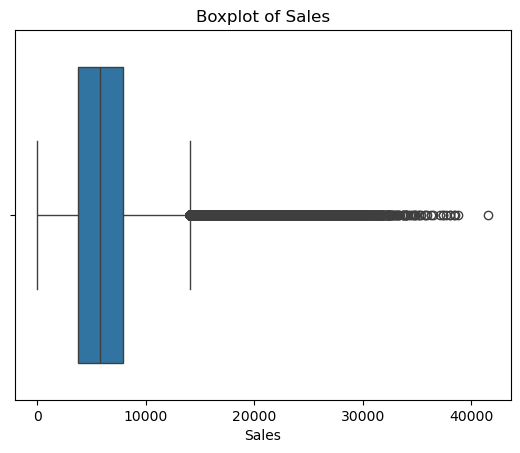

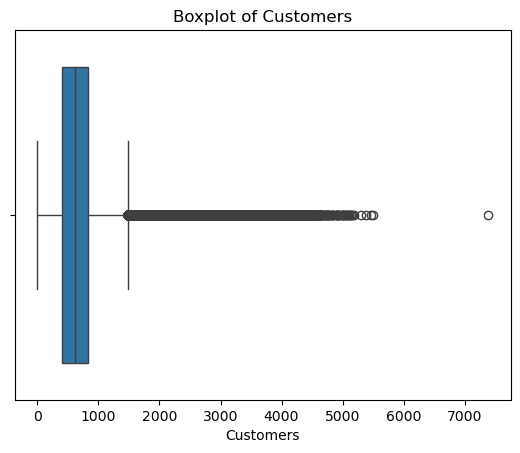

In [82]:
# Boxplot to detect outliers in 'Sales'
sns.boxplot(data=train_df, x='Sales')
plt.title('Boxplot of Sales')
plt.show()

# Boxplot to detect outliers in 'Customers'
sns.boxplot(data=train_df, x='Customers')
plt.title('Boxplot of Customers')
plt.show()


In [83]:
# Calculate z-scores for 'Sales' and 'Customers'
train_df['Sales_zscore'] = zscore(train_df['Sales'])
train_df['Customers_zscore'] = zscore(train_df['Customers'])

# Identify rows where z-score is greater than 3 or less than -3 (outliers)
outliers_sales = train_df[train_df['Sales_zscore'].abs() > 3]
outliers_customers = train_df[train_df['Customers_zscore'].abs() > 3]

# Display outliers
print(f"Outliers in Sales: {outliers_sales[['Store', 'Sales']]}")
print(f"Outliers in Customers: {outliers_customers[['Store', 'Customers']]}")


Outliers in Sales:          Store  Sales
124        125  18227
250        251  22205
261        262  25774
319        320  19898
334        335  17867
...        ...    ...
1015502    523  20493
1015767    788  17934
1015796    817  25357
1015821    842  20355
1016093   1114  20642

[9731 rows x 2 columns]
Outliers in Customers:          Store  Customers
124        125       2041
250        251       2508
258        259       2628
261        262       3669
319        320       2316
...        ...        ...
1015748    769       2339
1015796    817       3462
1016093   1114       3401
1016356    262       2875
1016827    733       2377

[14148 rows x 2 columns]


In [84]:
# Remove rows with z-scores greater than 3 or less than -3
cleaned_train_df = train_df[(train_df['Sales_zscore'].abs() <= 3) & (train_df['Customers_zscore'].abs() <= 3)]
print(f"Cleaned dataset shape: {cleaned_train_df.shape}")


Cleaned dataset shape: (999832, 11)


Save the cleaned data

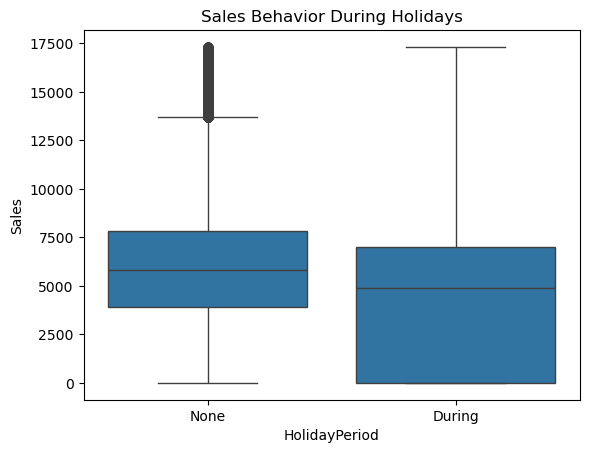

In [85]:
cleaned_train_df = cleaned_train_df.copy()

# Convert 'Date' column to datetime
cleaned_train_df.loc[:, 'Date'] = pd.to_datetime(cleaned_train_df['Date'])

# Create a column to represent holiday periods (Before, During, After)
cleaned_train_df.loc[:, 'HolidayPeriod'] = cleaned_train_df['StateHoliday'].apply(lambda x: 'During' if x != '0' else 'None')

# Compare sales behavior during holidays
sns.boxplot(data=cleaned_train_df, x='HolidayPeriod', y='Sales')
plt.title('Sales Behavior During Holidays')
plt.show()

Seasonal behaviour

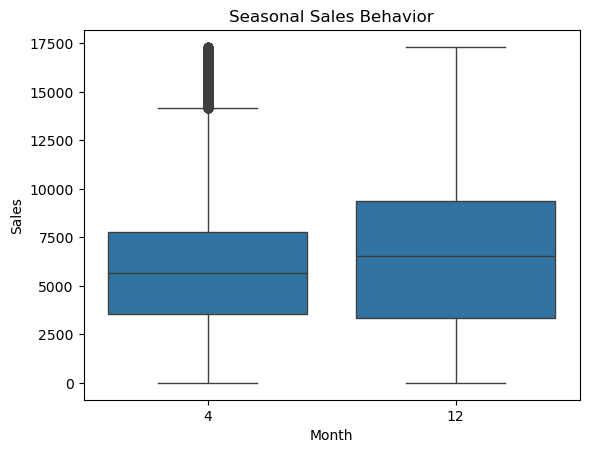

In [86]:
# Ensure 'Date' column is in datetime format
cleaned_train_df['Date'] = pd.to_datetime(cleaned_train_df['Date'])

# Extract month and year for seasonal analysis
cleaned_train_df['Month'] = cleaned_train_df['Date'].dt.month
cleaned_train_df['Year'] = cleaned_train_df['Date'].dt.year

# Plot sales for December (Christmas) and April (Easter)
sns.boxplot(data=cleaned_train_df[cleaned_train_df['Month'].isin([12, 4])], x='Month', y='Sales')
plt.title('Seasonal Sales Behavior')
plt.show()

Correlation Between Sales and Number of Customers

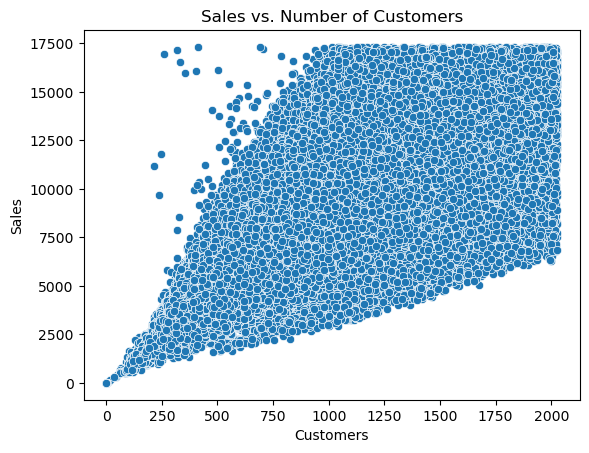

Correlation between Sales and Customers: 0.9088533812155788


In [87]:
# Scatter plot for sales vs. customers
sns.scatterplot(data=cleaned_train_df, x='Customers', y='Sales')
plt.title('Sales vs. Number of Customers')
plt.show()

# Calculate correlation coefficient
corr = cleaned_train_df[['Sales', 'Customers']].corr()
print(f'Correlation between Sales and Customers: {corr.iloc[0,1]}')


How Does Promo Affect Sales?

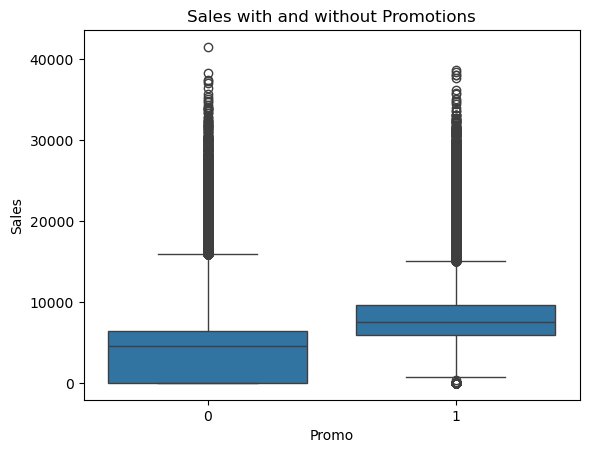

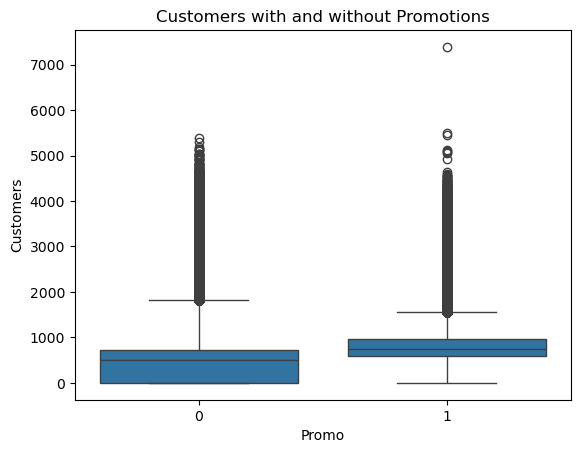

In [88]:
# Box plot to show sales with and without promo
sns.boxplot(data=train_df, x='Promo', y='Sales')
plt.title('Sales with and without Promotions')
plt.show()

# Box plot to show number of customers with and without promo
sns.boxplot(data=train_df, x='Promo', y='Customers')
plt.title('Customers with and without Promotions')
plt.show()


Which Stores Should Promos Be Deployed In?

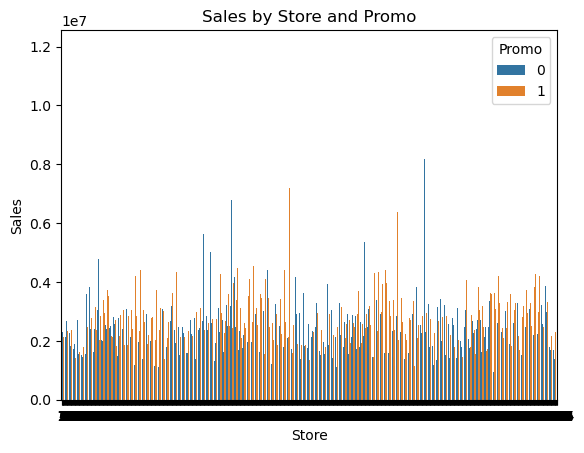

In [89]:
# Group by store and promo
store_sales_promo = train_df.groupby(['Store', 'Promo'])[['Sales', 'Customers']].sum().reset_index()

# Filter stores where promo had a significant effect on sales
sns.barplot(data=store_sales_promo, x='Store', y='Sales', hue='Promo')
plt.title('Sales by Store and Promo')
plt.show()


 Trends of Customer Behavior During Store Opening and Closing Times

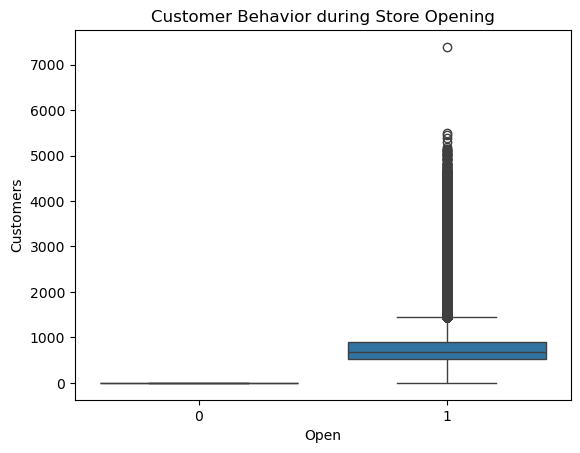

In [90]:
# Box plot to compare customer behavior based on store opening status
sns.boxplot(data=train_df, x='Open', y='Customers')
plt.title('Customer Behavior during Store Opening')
plt.show()


Which Stores Are Open on All Weekdays?

In [91]:
# Count how often stores are open during weekdays
stores_open_weekdays = train_df.groupby('Store')['DayOfWeek'].nunique()
stores_open_weekdays = stores_open_weekdays[stores_open_weekdays == 7]  # Stores open all weekdays
print(f"Stores open all weekdays: {stores_open_weekdays.index.tolist()}")


Stores open all weekdays: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 2

How Does Assortment Type Affect Sales?

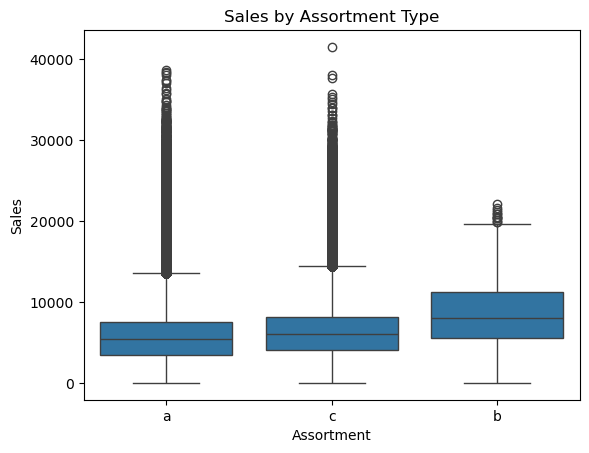

In [92]:
# Box plot to compare sales by assortment type
sns.boxplot(data=store_df.merge(train_df, on='Store'), x='Assortment', y='Sales')
plt.title('Sales by Assortment Type')
plt.show()


Distance to Next Competitor

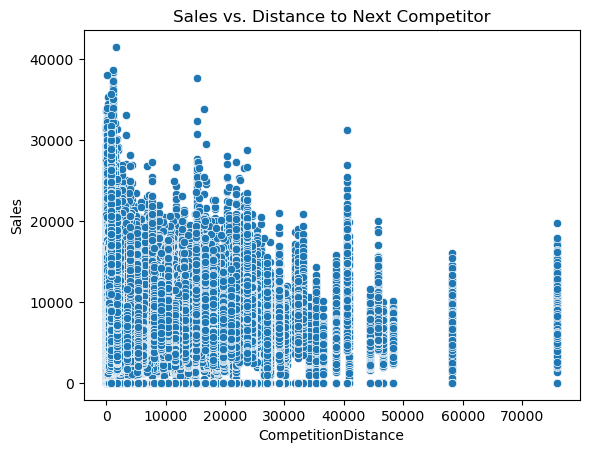

In [93]:
# Scatter plot of competition distance vs sales
sns.scatterplot(data=store_df.merge(train_df, on='Store'), x='CompetitionDistance', y='Sales')
plt.title('Sales vs. Distance to Next Competitor')
plt.show()


 How Does the Opening or Reopening of Competitors Affect Sales?

In [94]:
# Check for stores with NA values in competition distance but later have values
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(method='ffill')
reopened_competitors = store_df[store_df['CompetitionDistance'].isna() & store_df['CompetitionDistance'].notna()]
print(f"Stores with reopening competitors: {reopened_competitors['Store'].tolist()}")


Stores with reopening competitors: []


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_13024\2184379429.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(method='ffill')


In [95]:
# Define the columns to scale
columns_to_scale = ['Sales', 'Customers', 'Sales_zscore', 'Customers_zscore']

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected columns
scaled_features = scaler.fit_transform(cleaned_train_df[columns_to_scale])

# Add the scaled features back to the dataframe
scaled_df = cleaned_train_df.copy()
scaled_df[columns_to_scale] = scaled_features

# Save the DataFrame to a CSV file
scaled_df.to_csv('../src/data/cleaned_data/cleaned_train_df.csv', index=False)


scaled_df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_zscore,Customers_zscore,HolidayPeriod,Month,Year
0,1,5,2015-07-31,-0.087914,-0.117987,1,1,0,1,-0.087914,-0.117987,None,7,2015
1,2,5,2015-07-31,0.139929,0.062890,1,1,0,1,0.139929,0.062890,None,7,2015
2,3,5,2015-07-31,0.779935,0.569346,1,1,0,1,0.779935,0.569346,None,7,2015
3,4,5,2015-07-31,2.395880,2.318684,1,1,0,1,2.395880,2.318684,None,7,2015
4,5,5,2015-07-31,-0.213355,-0.107651,1,1,0,1,-0.213355,-0.107651,None,7,2015
